In [1]:
# Mathematical functions
import math
from scipy import stats 
# Data manipulation
import numpy as np
import pandas as pd

# Plotting and visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Missing data imputation
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, KNNImputer, IterativeImputer
from io import StringIO 

# Categorical data encoding
from sklearn.preprocessing import LabelEncoder

# Train-test split and k-fold cross validation
from sklearn.model_selection import train_test_split

# Feature selection
from sklearn.feature_selection import SelectKBest, chi2, mutual_info_classif


# Classification algorithms
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier

# Model evaluation
from sklearn import metrics
from sklearn.metrics import f1_score
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
# Explainable AI
!pip install --quiet shap==0.39.0
import shap

# Warning suppression
import warnings
warnings.filterwarnings('ignore')
import acquire
import prepare 

Acquire CSV

In [2]:
get = acquire.get_data()

Prepare

In [3]:
df = prepare.prep_data(get)
df.head()

,Age_band_of_driver,Driving_experience,Area_accident_occured,Light_conditions,Number_of_vehicles_involved,Number_of_casualties,Casualty_class,Age_band_of_casualty,Casualty_severity,Fitness_of_casuality,...,Weather_conditions_Raining,Weather_conditions_Raining and Windy,Weather_conditions_Snow,Weather_conditions_Unknown,Weather_conditions_Windy,Sex_of_casualty_Male,Educational_level_Elementary,Educational_level_High School,Educational_level_High school,Educational_level_Junior High
0,2,4,2,3,2,2,1,2,3.0,1,...,0,0,0,0,0,0,0,1,0,0
1,3,3,1,3,2,2,1,2,3.0,1,...,0,0,0,0,0,0,0,0,0,1
2,2,4,9,3,2,2,1,3,3.0,1,...,0,0,0,0,0,1,0,0,0,1
3,2,1,1,2,2,2,2,2,3.0,1,...,0,0,0,0,0,0,0,0,0,1
4,2,2,4,2,2,2,1,2,3.0,1,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
df = prepare.prep_data(get)
df.head()

In [ ]:
df = df.replace('Unknown or other', 'other')
df = df.replace('Darkness - lights unlit', 'Darkness - no lighting')
df['Age_band_of_casualty'] = df['Age_band_of_casualty'].replace('5', 'Under 18')

In [ ]:
df['baseline_prediction'] = np.where(df['Casualty_class']== 'Driver or rider', True, False)
df.head()

In [ ]:
df['baseline_prediction'] = np.where(df['Casualty_class']== 'Driver or rider', 1 , 2)

In [ ]:
df['baseline_prediction'].isnull().sum()

In [ ]:
df.Weather_conditions.value_counts()

In [ ]:
df['Age_band_of_casualty '] = df.Age_band_of_casualty .map({'Under 18' : 1, '18-30' : 2, '31-50' : 3, 'Over 51' : 4})
df['Age_band_of_driver'] = df.Age_band_of_driver.map({'Under 18' : 1, '18-30' : 2, '31-50' : 3, 'Over 51' : 4, 'Unknown' : 5})


df['Casualty_class'] = df.Age_band_of_casualty.map({'Driver or rider' : 1, 'Pedestrian' : 2, 'Passenger' : 3, 'na' : 10})                                                          

In [ ]:
df.info()

In [ ]:
# number of duplicate rows
duplicate = df[df.duplicated() == True]
print("# of duplicate rows: {}".format(len(duplicate)))

In [ ]:
# number of missing values in columns
df.Educational_level.value_counts()

In [ ]:
df['Work_of_casuality'].isnull().sum()

In [ ]:
get.Weather_conditions.value_counts()

In [ ]:
df.Driving_experience.value_counts()

In [ ]:
df.loc[2:4, ['baseline_prediction', "Casualty_severity", 'Fitness_of_casuality']]

In [ ]:
df.isnull().sum()

In [ ]:
def prop_imputer(df):
    df_prop = df.copy(deep = True)
    missing_cols = df_prop.isna().sum()[df_prop.isna().sum() != 0].index.tolist()
    for col in missing_cols:
        values_col = df_prop[col].value_counts(normalize = True).index.tolist()
        probabilities_col = df_prop[col].value_counts(normalize = True).values.tolist()
        df_prop[col] = df_prop[col].fillna(pd.Series(np.random.choice(values_col, p = probabilities_col, size = len(df))))
    return df_prop

In [ ]:
df_imp = prop_imputer(df)

In [ ]:
df = df_imp
df.isnull().sum()

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 26 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Age_band_of_driver                    12316 non-null  int64  
 1   Driving_experience                    12316 non-null  int64  
 2   Area_accident_occured                 12316 non-null  int64  
 3   Light_conditions                      12316 non-null  int64  
 4   Number_of_vehicles_involved           12316 non-null  int64  
 5   Number_of_casualties                  12316 non-null  int64  
 6   Casualty_class                        12316 non-null  int64  
 7   Age_band_of_casualty                  12316 non-null  int64  
 8   Casualty_severity                     12316 non-null  float64
 9   Fitness_of_casuality                  12316 non-null  int64  
 10  Accident_severity                     12316 non-null  int64  
 11  Sex_of_driver_M

In [ ]:
# encode
#df['Age_band_of_driver'] = df.Age_band_of_driver.map({'Under 18' : 1, '18-30' : 2, '31-50' : 3, 'Over 51' : 4, 'Unknown' : 10})
#df['Educational_level'] = df.Educational_level.map({'Illiterate' : 1, 'Writing & reading' : 2, 'Elementary school' : 3, 'Junior high school' : 4, 'High school' : 5, 'Above high school' : 6, 'Unknown' : 10})
df['Driving_experience'] = df.Driving_experience.map({'Below 1yr' : 1, '1-2yr' : 2, '2-5yr' : 3, '5-10yr' : 4, 'Above 10yr' : 5, 'No Licence' : 0, 'unknown' : 10})
df['Light_conditions'] = df.Light_conditions.map({'Darkness - no lighting' : 1, 'Darkness - lights lit' : 2, 'Daylight' : 3})
df['Age_band_of_casualty'] = df.Age_band_of_casualty.map({'Under 18' : 1, '18-30' : 2, '31-50' : 3, 'Over 51' : 4, 'na' : 10})
df['Fitness_of_casuality'] = df.Fitness_of_casuality.map({'Normal' : 1, 'NormalNormal' : 2, 'Deaf' : 3, 'Other' : 4, 'Blind' : 4})
#df['Accident_severity'] = df.Accident_severity.map({'Slight Injury' : 1, 'Serious Injury' : 2, 'Fatal injury' : 3})
df.head(10)

In [ ]:
dummy_df = pd.get_dummies(df[['Area_accident_occured', \
                              'Weather_conditions', \
                              'Light_conditions', \
                              'Age_band_of_casualty', \
                              'Age_band_of_driver', \
                              'Sex_of_casualty',\
                              'Casualty_severity',\
                              'Accident_severity',\
                              'Educational_level']], dummy_na=False, \
                              drop_first=True)
    
    # Concat dummy dataframe to original 
df = pd.concat([df, dummy_df], axis=1)

In [ ]:
df = df.drop(['Area_accident_occured', 'Accident_severity', 'Educational_level', 'Light_conditions', 'Weather_conditions', 'Age_band_of_casualty', 'Age_band_of_driver', 'Educational_level_Unknown', 'Educational_level_Illiterate', 'Time', 'Lanes_or_Medians', 'Vehicle_movement', 'Types_of_Junction', 'Pedestrian_movement', 'Cause_of_accident', 'Type_of_collision', 'Vehicle_driver_relation', 'Type_of_vehicle', 'Road_surface_type', 'Road_surface_conditions', 'Day_of_week','Road_allignment', 'Fitness_of_casuality', 'Work_of_casuality', 'Sex_of_driver', 'Sex_of_casualty', 'Defect_of_vehicle', 'Owner_of_vehicle', 'Service_year_of_vehicle', 'Road_surface_type'], axis=1)



In [ ]:
get.loc[2:15, ['Time', "Weather_conditions"]]

In [ ]:
get.Time.min()
get.Time = pd.to_datetime(get.Time, infer_datetime_format=True)

In [ ]:
get['year'] = pd.DatetimeIndex(get['Time']).year
get.head()

In [ ]:
get['year'] = pd.DatetimeIndex(get['Time']).year

#### Explore

In [4]:
# split data and explore on train
def split(df, stratify_by='Casualty_class'):
    # split df into train_validate 
    train_validate, test = train_test_split(df, test_size=.20, random_state=13)
    train, validate = train_test_split(train_validate, test_size=.3, random_state=13)

    X_train = train.drop(columns=['Casualty_class'])
    y_train = train[['Casualty_class']]

    X_validate = validate.drop(columns=['Casualty_class'])
    y_validate = validate[['Casualty_class']]

    X_test = test.drop(columns=['Casualty_class'])
    y_test = test[['Casualty_class']]

    return train, X_train, X_validate, X_test, y_train, y_validate, y_test

In [5]:
train, X_train, X_validate, X_test, y_train, y_validate, y_test = split(df, stratify_by='Casualty_class')

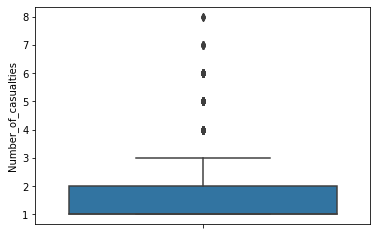

In [13]:
sns.boxplot(data=train, y='Number_of_casualties')
plt.show()

In [6]:
y_train.head()

,Casualty_class
10242,1
2673,1
5201,2
11438,2
11556,3


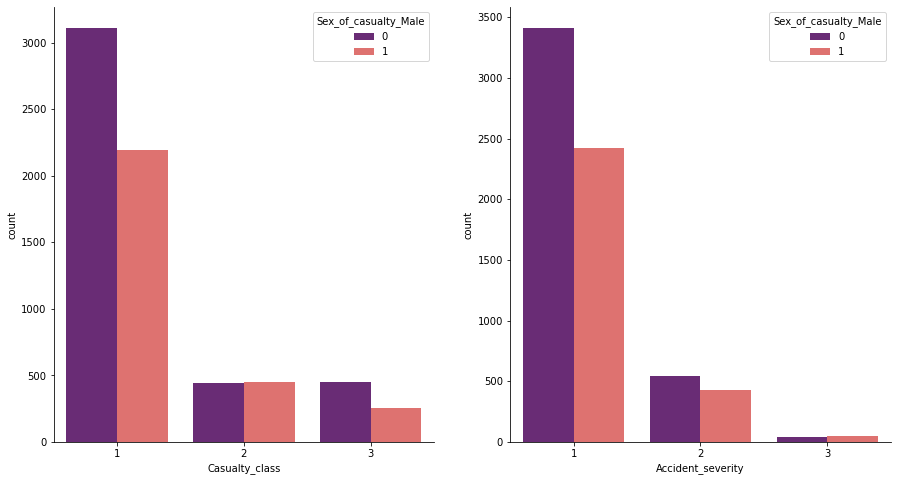

In [14]:
fig, ax =plt.subplots(1,2,figsize = (15,8))
sns.despine(top=True, right=True, left=False, bottom=False)
ax1 =sns.countplot("Casualty_class", hue="Sex_of_casualty_Male", 
              palette="magma", data=train, ax=ax[0])

ax2 = sns.countplot("Accident_severity", hue="Sex_of_casualty_Male", 
              palette="magma", data=train, ax=ax[1])

From this chart, generally there are more women in the casualty class, especially driver or rider. The count for women is also higher for accident severity.

In [16]:
df2 = train[train['Area_accident_occured'] ==  1]
df2

,Age_band_of_driver,Driving_experience,Area_accident_occured,Light_conditions,Number_of_vehicles_involved,Number_of_casualties,Casualty_class,Age_band_of_casualty,Casualty_severity,Fitness_of_casuality,...,Weather_conditions_Raining,Weather_conditions_Raining and Windy,Weather_conditions_Snow,Weather_conditions_Unknown,Weather_conditions_Windy,Sex_of_casualty_Male,Educational_level_Elementary,Educational_level_High School,Educational_level_High school,Educational_level_Junior High
5201,2,1,1,3,2,1,2,2,3.0,1,...,0,0,0,0,0,0,1,0,0,0
3197,2,1,1,3,2,1,1,3,3.0,1,...,0,0,0,0,0,1,1,0,0,0
8414,3,1,1,2,2,2,1,3,3.0,1,...,0,0,0,0,0,1,0,0,0,1
5042,3,2,1,3,2,1,1,2,3.0,1,...,1,0,0,0,0,0,0,0,0,1
7449,3,1,1,3,2,2,1,2,3.0,1,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6547,3,2,1,3,2,1,1,2,3.0,1,...,0,0,0,0,0,0,1,0,0,0
2738,4,1,1,3,2,1,1,2,3.0,1,...,0,0,0,0,0,0,0,0,0,1
7340,4,3,1,3,3,4,1,2,3.0,1,...,0,0,0,0,0,0,0,0,0,1
3606,2,5,1,2,2,1,1,2,3.0,1,...,0,0,0,0,0,1,0,0,0,1


In [ ]:
train.loc[2:4, ['Casualty_class']]

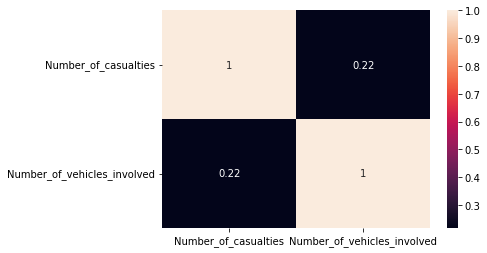

In [17]:
correlation_matrix = train[['Number_of_casualties','Number_of_vehicles_involved']].corr()
sns.heatmap(correlation_matrix, annot=True)
plt.show()

there is not much correlation to these variables 

In [ ]:
train.Fitness_of_casuality.value_counts()

In [ ]:
train.columns

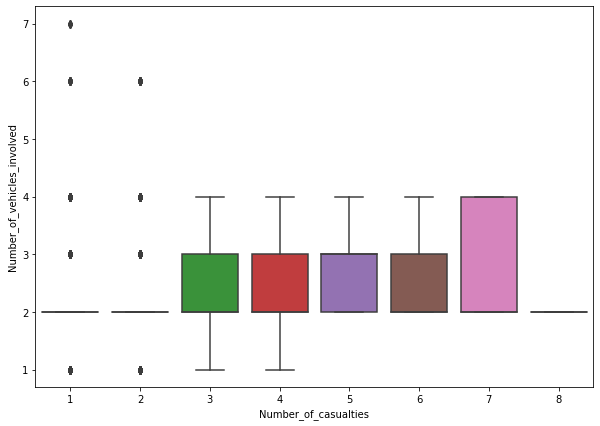

In [18]:
plt.figure(figsize=(10,7))
sns.boxplot(data=df, y='Number_of_vehicles_involved', x='Number_of_casualties')
plt.show()

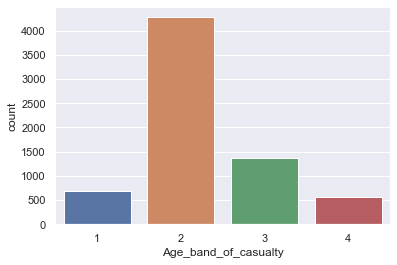

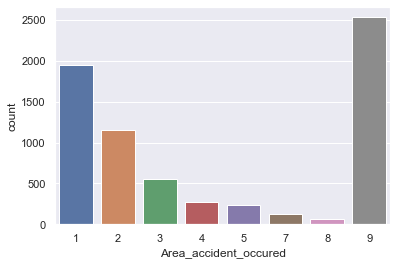

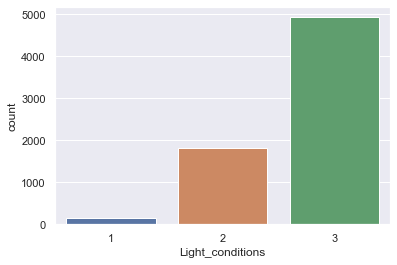

In [19]:
var = ["Age_band_of_casualty","Area_accident_occured", "Light_conditions"]
for v in var:
    sns.set(style="darkgrid")
    sns.countplot(x=v, data=train)
    plt.show()

### Does age have anything to do with casualty?

From these charts I can see that the highest age range for accidents is 18-30

In [ ]:
train.Educational_level.value_counts()

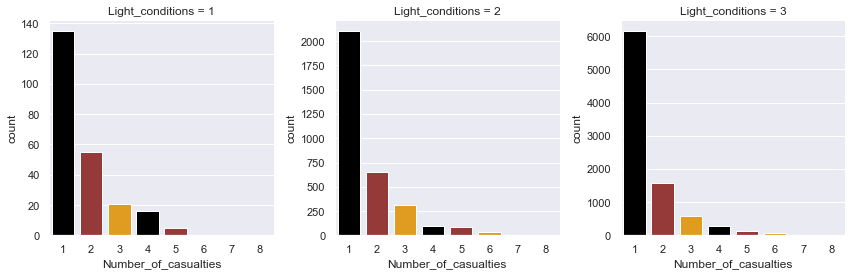

In [20]:
grid = sns.FacetGrid(data=df, col='Light_conditions', height=4, aspect=1, sharey=False)
# mapping bar plot and the data on to the grid
grid.map(sns.countplot, 'Number_of_casualties', palette=['black', 'brown', 'orange'])
plt.show()

A majority of accidents happen in the daytime and at night with lighting.

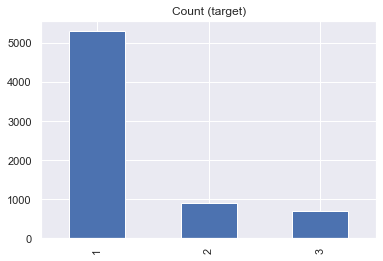

In [21]:
target_count = train['Casualty_class'].value_counts()

target_count.plot(kind='bar', title='Count (target)');

a majority of casualty class is driver/rider

#### Testing 

In [ ]:
a=train.Casualty_class
b=train.Light_conditions
observed = pd.crosstab(a,b)
observed

Ho - light conditions effects casualty class

Ha - light conditions do not effect it 

In [ ]:
chi2, p, degf, expected = stats.chi2_contingency(observed)
alpha = 0.05
print(f'chi2 = {chi2:.2f}')
print(f'p value: {p:.4f}')
if p < alpha:
      print('We can reject the null hypothesis')
else:
    print('We fail to reject the null hypothesis')

Ho - Driving experiance effects casualty class

Ha - Driving experiance does not effect it

In [ ]:
a2=train.Casualty_class
b2=train.Driving_experience
observed2 = pd.crosstab(a2,b2)
observed2

In [ ]:
chi2, p, degf, expected = stats.chi2_contingency(observed2)
alpha = 0.05
print(f'chi2 = {chi2:.2f}')
print(f'p value: {p:.4f}')
if p < alpha:
      print('We can reject the null hypothesis')
else:
    print('We fail to reject the null hypothesis')

In [22]:
df1 = train[train.isna().any(axis=1)]
df1

,Age_band_of_driver,Driving_experience,Area_accident_occured,Light_conditions,Number_of_vehicles_involved,Number_of_casualties,Casualty_class,Age_band_of_casualty,Casualty_severity,Fitness_of_casuality,...,Weather_conditions_Raining,Weather_conditions_Raining and Windy,Weather_conditions_Snow,Weather_conditions_Unknown,Weather_conditions_Windy,Sex_of_casualty_Male,Educational_level_Elementary,Educational_level_High School,Educational_level_High school,Educational_level_Junior High


In [7]:
# Chi-square feature selection
def feature_chi2(X_train, X_validate, X_test, k = 25):
     
    # Feature selection
    fs = SelectKBest(score_func = chi2, k = k)
    fs.fit(X_train, y_train)
    
    # Selected columns
    cols = fs.get_support(indices = True)
    
    # Output data
    X_train_fs = X_train.iloc[:, cols]
    X_validate_fs = X_validate.iloc[:, cols]
    X_test_fs = X_test.iloc[:, cols]
    
    return X_train_fs, X_validate_fs, X_test_fs

In [9]:
X_train_fs, X_validate_fs, X_test_fs = feature_chi2(X_train, X_validate, X_test, k = 25)

In [10]:
X_train_fs.head()

,Age_band_of_driver,Driving_experience,Area_accident_occured,Light_conditions,Number_of_vehicles_involved,Number_of_casualties,Age_band_of_casualty,Casualty_severity,Fitness_of_casuality,Accident_severity,...,Weather_conditions_Raining,Weather_conditions_Raining and Windy,Weather_conditions_Snow,Weather_conditions_Unknown,Weather_conditions_Windy,Sex_of_casualty_Male,Educational_level_Elementary,Educational_level_High School,Educational_level_High school,Educational_level_Junior High
10242,2,2,9,3,3,1,2,3.0,1,1,...,0,0,0,0,0,0,0,0,0,1
2673,2,1,9,3,1,1,2,3.0,1,1,...,0,0,0,0,0,0,0,0,0,0
5201,2,1,1,3,2,1,2,3.0,1,1,...,0,0,0,0,0,0,1,0,0,0
11438,2,3,9,3,2,1,3,3.0,1,1,...,0,0,0,0,0,0,0,0,0,1
11556,2,1,5,3,2,2,2,3.0,1,1,...,1,0,0,0,0,1,0,0,0,1


In [23]:
predictions = pd.DataFrame({
    'actual': train.Casualty_class
})

In [24]:
predictions['baseline'] = train[train['Casualty_class'] == 1].shape[0] /train.shape[0]
predictions.head()

,actual,baseline
10242,1,0.768997
2673,1,0.768997
5201,2,0.768997
11438,2,0.768997
11556,3,0.768997


### Random Forest

In [25]:
from sklearn.metrics import classification_report
# assign model
forest1 = RandomForestClassifier(max_depth=3, random_state=123)
#fit model
forest1.fit(X_train_fs, y_train)
y_predictions = forest1.predict(X_train_fs)
predictions['RF'] = forest1.predict(X_train_fs)

report = classification_report(y_train, y_predictions, output_dict=True)
print("Tree of depth 4")
pd.DataFrame(report)

Tree of depth 4


,1,2,3,accuracy,macro avg,weighted avg
precision,0.768997,0.0,0.0,0.768997,0.256332,0.591356
recall,1.000000,0.0,0.0,0.768997,0.333333,0.768997
f1-score,0.869416,0.0,0.0,0.768997,0.289805,0.668578
support,5303.000000,889.0,704.0,0.768997,6896.000000,6896.000000


In [26]:
from sklearn.metrics import mean_squared_error
# evaluate accuracy on dt
MSE = mean_squared_error(predictions.actual, predictions.RF)
RMSE = math.sqrt(MSE)
predictions['RF'] = RMSE
print("Root Mean Square Error:\n")
print(RMSE)

Root Mean Square Error:

0.7329856625054239


### Decision Tree 

Max depth 3

In [27]:
# call the model
tree1 = DecisionTreeClassifier(max_depth=3, random_state=123)
# fit the model
tree1 = tree1.fit(X_train_fs, y_train)
y_predictions = tree1.predict(X_train_fs)
predictions['DT'] = tree1.predict(X_train_fs)
report = classification_report(y_train, y_predictions, output_dict=True)
print("Tree of depth 7")
pd.DataFrame(report)

Tree of depth 7


,1,2,3,accuracy,macro avg,weighted avg
precision,0.811174,0.482270,0.443804,0.785963,0.579082,0.731269
recall,0.980200,0.076490,0.218750,0.785963,0.425147,0.785963
f1-score,0.887712,0.132039,0.293054,0.785963,0.437602,0.729587
support,5303.000000,889.000000,704.000000,0.785963,6896.000000,6896.000000


In [28]:
# evaluate accuracy on dt
MSE = mean_squared_error(predictions.actual, predictions.DT)
RMSE = math.sqrt(MSE)
predictions['DT'] = RMSE
print("Root Mean Square Error:\n")
print(RMSE)

Root Mean Square Error:

0.6835403266744803


### Decision Tree

max depth 5

In [29]:
# call the model
tree2 = DecisionTreeClassifier(max_depth=7, random_state=123)
# fit the model
tree2 = tree1.fit(X_train_fs, y_train)
y_predictions = tree2.predict(X_train_fs)
predictions['DT2'] = tree2.predict(X_train_fs)
report = classification_report(y_train, y_predictions, output_dict=True)
print("Tree of depth 5")
pd.DataFrame(report)

Tree of depth 5


,1,2,3,accuracy,macro avg,weighted avg
precision,0.811174,0.482270,0.443804,0.785963,0.579082,0.731269
recall,0.980200,0.076490,0.218750,0.785963,0.425147,0.785963
f1-score,0.887712,0.132039,0.293054,0.785963,0.437602,0.729587
support,5303.000000,889.000000,704.000000,0.785963,6896.000000,6896.000000


In [30]:
# evaluate accuracy on dt2
MSE = mean_squared_error(predictions.actual, predictions.DT2)
RMSE = math.sqrt(MSE)
predictions['DT2'] = RMSE
print("Root Mean Square Error:\n")
print(RMSE)

Root Mean Square Error:

0.6835403266744803


In [31]:
predictions.head()

,actual,baseline,RF,DT,DT2
10242,1,0.768997,0.732986,0.68354,0.68354
2673,1,0.768997,0.732986,0.68354,0.68354
5201,2,0.768997,0.732986,0.68354,0.68354
11438,2,0.768997,0.732986,0.68354,0.68354
11556,3,0.768997,0.732986,0.68354,0.68354


#### Model on validate

In [32]:
pred_Valid = pd.DataFrame({
    'actual': y_validate.Casualty_class
})

In [33]:
pred_Valid['baseline'] = train[train['Casualty_class'] == 1].shape[0] /train.shape[0]
pred_Valid.head()

,actual,baseline
11303,2,0.768997
5288,1,0.768997
9481,1,0.768997
11479,1,0.768997
8266,1,0.768997


In [34]:
# RF on valid and get RMSE
pred_Valid['RF_Valid'] = forest1.predict(X_validate_fs)
MSE = mean_squared_error(pred_Valid.actual, pred_Valid.RF_Valid)
RMSE = math.sqrt(MSE)
pred_Valid['RF_Valid'] = RMSE

In [35]:
# dt on valid and get RMSE
pred_Valid['DT_Valid'] = tree1.predict(X_validate_fs)
MSE = mean_squared_error(pred_Valid.actual, pred_Valid.DT_Valid)
RMSE = math.sqrt(MSE)
pred_Valid['DT_Valid'] = RMSE

In [36]:
# dt2 on valid and get RMSE
pred_Valid['DT2_Valid'] = tree2.predict(X_validate_fs)
MSE = mean_squared_error(pred_Valid.actual, pred_Valid.DT2_Valid)
RMSE = math.sqrt(MSE)
pred_Valid['DT2_Valid'] = RMSE

In [37]:
pred_Valid.head()

,actual,baseline,RF_Valid,DT_Valid,DT2_Valid
11303,2,0.768997,0.75388,0.724592,0.724592
5288,1,0.768997,0.75388,0.724592,0.724592
9481,1,0.768997,0.75388,0.724592,0.724592
11479,1,0.768997,0.75388,0.724592,0.724592
8266,1,0.768997,0.75388,0.724592,0.724592


### Test 

Random forest model was the best on validate

In [38]:
# df to hold predictions 
pred_Test = pd.DataFrame({
    'actual': y_test.Casualty_class
})
pred_Test['baseline'] = train[train['Casualty_class'] == 1].shape[0] /train.shape[0]
pred_Test.head()

,actual,baseline
6199,1,0.768997
10283,3,0.768997
3539,3,0.768997
5794,3,0.768997
10043,2,0.768997


In [39]:
pred_Test['RF_Test'] = forest1.predict(X_test_fs)
MSE = mean_squared_error(pred_Test.actual, pred_Test.RF_Test)
RMSE = math.sqrt(MSE)
pred_Test['RF_Test'] = RMSE
pred_Test.head()

,actual,baseline,RF_Test
6199,1,0.768997,0.749459
10283,3,0.768997,0.749459
3539,3,0.768997,0.749459
5794,3,0.768997,0.749459
10043,2,0.768997,0.749459


In [40]:
# ugh, this was the worst data set to use